# Common paragraphs

In [16]:
# Iterative paragraph deduplication for coarse_cleaned_patents.jsonl
# Each run updates the blacklist and shows remaining common paragraphs.
# Saves only when you want to write the final deduplicated dataset.

from collections import Counter
import json

# ---------- Config ----------
input_file = "coarse_cleaned_patents.jsonl"

# ---------- Blacklist ----------
# Start empty, or add known boilerplate paragraphs here.
# Each run you can append new paragraphs to the blacklist.
blacklist = set([
    # TOKENS
    "<TAB>", 
    "<CHM>", 
    "<CHM>\n<CHM>\n<CHM>\n",
    "<IMG>",
    "<CHM>\n<CHM>",
    "<NPL>.",
    "<NPL>",
    "<MAT>",
    "<NPL>)",
    "<CIT>",
    # Invention in claims
    "The invention is set out in the appended set of claims.",
    "The invention is defined by the claims.",
    "The invention is defined by the appended claims.",
    "The present invention is defined by the appended claims.",
    "The invention is defined in the appended claims.",
    "This object is solved by the subject matter of the independent claims.",
    "The invention is set out in the appended claims.",
    "The present invention is defined in the appended claims.",
    "The invention is defined in the claims.",
    # Embodiments
    "Additional aspects will be set forth in part in the description which follows and, in part, will be apparent from the description, or may be learned by practice of the presented embodiments.",
    "A detailed description of one or more embodiments of the disclosed apparatus and method are presented herein by way of exemplification and not limitation with reference to the Figures.",
    "Other aspects, advantages, and salient features of the disclosure will become apparent to those skilled in the art from the following detailed description, which, taken in conjunction with the annexed drawings, discloses various embodiments of the disclosure.",
    "The description set forth herein, in connection with the appended drawings, describes example configurations and does not represent all the examples that may be implemented or that are within the scope of the claims. The term \"exemplary\" used herein means \"serving as an example, instance, or illustration,\" and not \"preferred\" or \"advantageous over other examples.\" The detailed description includes specific details for the purpose of providing an understanding of the described techniques. These techniques, however, may be practiced without these specific details. In some instances, well-known structures and devices are shown in block diagram form in order to avoid obscuring the concepts of the described examples.",   
    "It is to be understood that both the foregoing general description and the following detailed description are exemplary and explanatory only and are not restrictive of the invention, as claimed.",
    "The detailed description set forth below in connection with the appended drawings is intended as a description of various configurations and is not intended to represent the only configurations in which the concepts described herein may be practiced. The detailed description includes specific details for the purpose of providing a thorough understanding of various concepts. However, it will be apparent to those skilled in the art that these concepts may be practiced without these specific details. In some instances, well known structures and components are shown in block diagram form in order to avoid obscuring such concepts.",
    "A full and enabling disclosure of the present invention, including the best mode thereof, directed to one of ordinary skill in the art, is set forth in the specification, which makes reference to the appended figures, in which:",
    "Preferred embodiments are defined by the dependent claims.",
    # Drawings
    "A detailed description of one or more embodiments of the disclosed apparatus and method are presented herein by way of exemplification and not limitation with reference to the Figures.",
    "In the drawings:",
    "In the accompanying drawings:",
    "Like reference numbers and designations in the various drawings indicate like elements.",
    "Like reference symbols in the various drawings indicate like elements.",
    "The following descriptions should not be considered limiting in any way. With reference to the accompanying drawings, like elements are numbered alike:",
    "These and other aspects of the invention will be apparent from and elucidated with reference to the embodiment(s) described hereinafter.",
    "As indicated above, <FIG> is provided as an example. Other examples may differ from what is described with regard to <FIG>.",
    "The above and other aspects, features, and advantages of certain embodiments of the disclosure will be more apparent from the following description taken in conjunction with the accompanying drawings, in which:",
    "Although <FIG> shows example blocks of process <NUM>, in some aspects, process <NUM> may include additional blocks, fewer blocks, different blocks, or differently arranged blocks than those depicted in <FIG>. Additionally, or alternatively, two or more of the blocks of process <NUM> may be performed in parallel.",
    "In the appended figures, similar components or features may have the same reference label. Further, various components of the same type may be distinguished by following the reference label by a dash and a second label that distinguishes among the similar components. If just the first reference label is used in the specification, the description is applicable to any one of the similar components having the same first reference label irrespective of the second reference label, or other subsequent reference label.",
    "This Summary is provided to introduce a selection of concepts in a simplified form that are further described below in the Detailed Description. This Summary is not intended to identify key features or essential features of the claimed subject matter, nor is it intended to be used as an aid in determining the scope of the claimed subject matter.",
    "It should be noted that the methods described herein describe possible implementations, and that the operations and the steps may be rearranged or otherwise modified and that other implementations are possible. Further, aspects from two or more of the methods may be combined.",
    "These and other features, aspects, and advantages of the present disclosure will become better understood when the following detailed description is read with reference to the accompanying drawings in which like characters represent like parts throughout the drawings, wherein:",
    "With reference to the appended drawings, below follows a more detailed description of embodiments of the invention cited as examples.",
    "As indicated above, <FIG> is provided as an example. Other examples may differ from what is described with respect to <FIG>.",
    "The accompanying drawings illustrate a preferred embodiment of the present disclosure and together with the foregoing disclosure, serve to provide further understanding of the technical features of the present disclosure, and thus, the present disclosure is not construed as being limited to the drawing.",
    "Further features of the present invention will become apparent from the following description of exemplary embodiments with reference to the attached drawings.",
    "Hereinafter, the present invention will be described in detail.",
    # Table
    "The results are shown in Table <NUM>.",
    "The results are summarized in Table <NUM> below.",
    # Plurals
    "It is to be understood that the singular forms \"a,\" \"an,\" and \"the\" include plural referents unless the context clearly dictates otherwise. Thus, for example, reference to \"a component surface\" includes reference to one or more of such surfaces.",
    "The terminology used herein is for the purpose of describing particular embodiments only and is not intended to be limiting of the present disclosure. As used herein, the singular forms \"a\", \"an\" and \"the\" are intended to include the plural forms as well, unless the context clearly indicates otherwise. It will be further understood that the terms \"comprises\" and/or \"comprising,\" when used in this specification, specify the presence of stated features, integers, steps, operations, elements, and/or components, but do not preclude the presence or addition of one or more other features, integers, steps, operations, element components, and/or groups thereof."
    # Citations
    "Patent Literature <NUM>: <CIT>",
    "Patent Document <NUM>: <CIT>",
    "PTL <NUM>: <CIT>",
    # Wherein
    "wherein",
    "wherein:",
    # Mass spec
    "MS m/z (ESI): <NUM> [M+H]+.",
    "m/z ES+ [M+H]+ <NUM>.",
    "LC-MS (ESI): m/z (M+<NUM>): <NUM> (Method <NUM>)",
    "LC-MS (Method <NUM>): Rt = <NUM>; MS (ESIpos): m/z = <NUM> [M+H]+",
    "LC-MS (method <NUM>): Rt = <NUM>; MS (ESlpos): m/z = <NUM> [M+H]+",
    "In Formula <NUM>,",
    # Chemistry boilerplate
    "In a further embodiment of the first aspect, the present invention covers compounds of formula (I), supra, in which:",
    "In further embodiments of the above-mentioned aspects, the invention relates to compounds of formula (I), where",
    "and stereoisomers, tautomers, N-oxides, hydrates, solvates, and salts thereof, and mixtures of same.",
    "In some embodiments, the substituted ring B is \n<CHM>",
    "In further embodiments of the above-mentioned aspects, the invention relates to compounds of formula (I), wherein:",
    # Transmitter boilerplate
    "The transmitter <NUM> may transmit signals generated by other components of the device <NUM>. In some examples, the transmitter <NUM> may be collocated with a receiver <NUM> in a transceiver module. For example, the transmitter <NUM> may be an example of aspects of the transceiver <NUM> described with reference to <FIG>. The transmitter <NUM> may utilize a single antenna or a set of antennas.",
    "In some cases, the wireless device may include a single antenna <NUM>. However, in some cases the device may have more than one antenna <NUM>, which may be capable of concurrently transmitting or receiving multiple wireless transmissions.",
    # Process boilerplate
    "Process <NUM> may include additional aspects, such as any single aspect or any combination of aspects described below and/or in connection with one or more other processes described elsewhere herein.",
    # Biomarker
    "The biomarker of SEQ ID NO: <NUM> may be used to assess the responsiveness of a cancer patient (e.g., a patient with cancer recurrence) to 2X-<NUM> or a pharmaceutically acceptable salt thereof. The expression level of the biomarker of SEQ ID NO: <NUM> may be assessed using nucleic acid amplification methods (e.g., PCR) or a device (e.g., a microarray). As is described above, the expression level of the biomarker of SEQ ID NO: <NUM> in the patient sample may then be compared, e.g., to the expression level of the biomarker of SEQ ID NO: <NUM> in a cell (e.g., a cancer cell) or tissue (e.g., a tumor tissue) known to be sensitive or resistant to treatment with 2X-<NUM> or a pharmaceutically acceptable salt thereof and used to determine the cancer patient's responsiveness to 2X-<NUM> or a pharmaceutically acceptable salt thereof. The biomarker of SEQ ID NO: <NUM> may be used to predict responsiveness of the cancer patient to treatment with 2X-<NUM> or a pharmaceutically acceptable salt thereof in combination with one or more additional biomarker(s), including SRSF7 (SEQ ID NO:<NUM>), (e.g., one, two, three, four, five, ten, fifteen, twenty, twenty five, or all of the biomarkers shown in Tables <NUM> and/or <NUM> (e.g., the top one biomarker shown in Tables <NUM> and/or <NUM>, the top two biomarkers shown in Tables <NUM> and/or <NUM>, the top three biomarkers shown in Tables <NUM> and/or <NUM>, the top four biomarkers shown in Tables <NUM> and/or <NUM>, the top five biomarkers shown in Tables <NUM> and/or <NUM>, the top ten biomarkers shown in Tables <NUM> and/or <NUM>, the top fifteen biomarkers shown in Tables <NUM> and/or <NUM>, the top twenty biomarkers shown in Tables <NUM> and/or <NUM>, the top twenty five biomarkers shown in Tables <NUM> and/or <NUM>, or all of the biomarkers shown in Tables <NUM> and/or <NUM>)), such as biomarker(s) of SEQ ID NOs: <NUM>-<NUM>, <NUM>-<NUM>. The expression level of the biomarker(s) may be determined using, e.g., a microarray, PCR, or other techniques described herein, for example, using a nucleic acid probe sequence based on the target sequences shown in Tables <NUM> and <NUM>.",
    # Computer boilerplate
    "The communications manager <NUM>, or its sub-components, may be physically located at various positions, including being distributed such that portions of functions are implemented at different physical locations by one or more physical components. In some examples, the communications manager <NUM>, or its sub-components, may be a separate and distinct component in accordance with various aspects of the present disclosure. In some examples, the communications manager <NUM>, or its sub-components, may be combined with one or more other hardware components, including but not limited to an input/output (I/O) component, a transceiver, a network server, another computing device, one or more other components described in the present disclosure, or a combination thereof in accordance with various aspects of the present disclosure.",
    "Moreover, various functions described below can be implemented or supported by one or more computer programs, each of which is formed from computer readable program code and embodied in a computer readable medium. The terms \"application\" and \"program\" refer to one or more computer programs, software components, sets of instructions, procedures, functions, objects, classes, instances, related data, or a portion thereof adapted for implementation in a suitable computer readable program code. The phrase \"computer readable program code\" includes any type of computer code, including source code, object code, and executable code. The phrase \"computer readable medium\" includes any type of medium capable of being accessed by a computer, such as read only memory (ROM), random access memory (RAM), a hard disk drive, a compact disc (CD), a digital video disc (DVD), or any other type of memory. A \"non-transitory\" computer readable medium excludes wired, wireless, optical, or other communication links that transport transitory electrical or other signals. A non-transitory computer readable medium includes media where data can be permanently stored and media where data can be stored and later overwritten, such as a rewritable optical disc or an erasable memory device.",
    "The core network <NUM> may provide user authentication, access authorization, tracking, Internet Protocol (IP) connectivity, and other access, routing, or mobility functions. The core network <NUM> may be an evolved packet core (EPC), which may include at least one mobility management entity (MME), at least one serving gateway (S-GW), and at least one Packet Data Network (PDN) gateway (P-GW). The MME may manage non-access stratum (e.g., control plane) functions such as mobility, authentication, and bearer management for UEs <NUM> served by base stations <NUM> associated with the EPC. User IP packets may be transferred through the S-GW, which itself may be connected to the P-GW. The P-GW may provide IP address allocation as well as other functions. The P-GW may be connected to the network operators IP services. The operators IP services may include access to the Internet, Intranet(s), an IP Multimedia Subsystem (IMS), or a Packet-Switched (PS) Streaming Service.",
    "The power management module <NUM> may manage power supplied to the electronic device <NUM>. According to one embodiment, the power management module <NUM> may be implemented as at least part of, for example, a power management integrated circuit (PMIC).",
    "At least some of the above-described components may be coupled mutually and communicate signals (e.g., commands or data) therebetween via an inter-peripheral communication scheme (e.g., a bus, general purpose input and output (GPIO), serial peripheral interface (SPI), or mobile industry processor interface (MIPI)).",
    "The interface <NUM> may support one or more specified protocols to be used for the electronic device <NUM> to be coupled with the external electronic device (e.g., the electronic device <NUM>) directly (e.g., wiredly) or wirelessly. According to an embodiment, the interface <NUM> may include, for example, a high definition multimedia interface (HDMI), a universal serial bus (USB) interface, a secure digital (SD) card interface, or an audio interface.",
    "The program <NUM> may be stored in the memory <NUM> as software, and may include, for example, an operating system (OS) <NUM>, middleware <NUM>, or an application <NUM>.",
    "At least some of the above-described components may be coupled mutually and communicate signals (e.g., commands or data) therebetween via an inter-peripheral communication scheme (e.g., a bus, general purpose input and output (GPIO), serial peripheral interface (SPI), or mobile industry processor interface (MIPI))",
    "The code <NUM> may include instructions to implement aspects of the present disclosure, including instructions to support wireless communications. The code <NUM> may be stored in a non-transitory computer-readable medium such as system memory or other type of memory. In some cases, the code <NUM> may not be directly executable by the processor <NUM> but may cause a computer (e.g., when compiled and executed) to perform functions described herein.",
    "The battery <NUM> may supply power to at least one component of the electronic device <NUM>. According to an embodiment, the battery <NUM> may include, for example, a primary cell which is not rechargeable, a secondary cell which is rechargeable, or a fuel cell.",
    "The sensor module <NUM> may detect an operational state (e.g., power or temperature) of the electronic device <NUM> or an environmental state (e.g., a state of a user) external to the electronic device <NUM>, and then generate an electrical signal or data value corresponding to the detected state. According to an embodiment, the sensor module <NUM> may include, for example, a gesture sensor, a gyro sensor, an atmospheric pressure sensor, a magnetic sensor, an acceleration sensor, a grip sensor, a proximity sensor, a color sensor, an infrared (IR) sensor, a biometric sensor, a temperature sensor, a humidity sensor, or an illuminance sensor.",
    "The computing system can include clients and servers. A client and server are generally remote from each other and typically interact through a communication network. The relationship of client and server arises by virtue of computer programs running on the respective computers and having a client-server relationship to each other.",
    "Computer readable program instructions described herein can be downloaded to respective computing/processing devices from a computer readable storage medium or to an external computer or external storage device via a network, for example, the Internet, a local area network, a wide area network and/or a wireless network. The network may comprise copper transmission cables, optical transmission fibers, wireless transmission, routers, firewalls, switches, gateway computers and/or edge servers. A network adapter card or network interface in each computing/processing device receives computer readable program instructions from the network and forwards the computer readable program instructions for storage in a computer readable storage medium within the respective computing/processing device.",
    "The transceiver <NUM> may communicate bi-directionally, via one or more antennas, wired, or wireless links as described above. For example, the transceiver <NUM> may represent a wireless transceiver and may communicate bi-directionally with another wireless transceiver. The transceiver <NUM> may also include a modem to modulate the packets and provide the modulated packets to the antennas for transmission, and to demodulate packets received from the antennas.",
    "A connecting terminal <NUM> may include a connector via which the electronic device <NUM> may be physically connected with the external electronic device (e.g., the electronic device <NUM>). According to an embodiment, the connecting terminal <NUM> may include, for example, a HDMI connector, a USB connector, a SD card connector, or an audio connector (e.g., a headphone connector).",
    # Camera
    "The camera module <NUM> may capture a still image or moving images. According to an embodiment, the camera module <NUM> may include one or more lenses, image sensors, image signal processors, or flashes."
])

# ---------- Counters ----------
total_counts = Counter()         # Total appearances across all documents
doc_counts = Counter()           # Number of documents paragraph appears in

with open(input_file, "r", encoding="utf-8") as f:
    for line in f:
        doc = json.loads(line)
        desc_paras = [p.strip() for p in doc["description"].split("\n\n") if p.strip()]
        # Track paragraphs in this doc to count doc presence
        seen_in_doc = set()
        for para in desc_paras:
            if para in blacklist:
                continue
            total_counts[para] += 1
            if para not in seen_in_doc:
                doc_counts[para] += 1
                seen_in_doc.add(para)

# ---------- Show remaining most common paragraphs ----------
print("Top 50 remaining paragraphs (total count / document count):")
for para, _ in total_counts.most_common(50):
    print(f"[Total: {total_counts[para]}, Docs: {doc_counts[para]}] {para}")  # first 200 chars

Top 50 remaining paragraphs (total count / document count):
[Total: 313, Docs: 1] In some embodiments, the substituted ring B is
<CHM>
[Total: 296, Docs: 2] Isolated as a white solid (<NUM>, <NUM>%).
[Total: 244, Docs: 244] The camera module <NUM> may capture a still image or moving images. According to an embodiment, the camera module <NUM> may include one or more lenses, image sensors, image signal processors, or flashes.
[Total: 229, Docs: 229] The haptic module <NUM> may convert an electrical signal into a mechanical stimulus (e.g., a vibration or a movement) or electrical stimulus which may be recognized by a user via his tactile sensation or kinesthetic sensation. According to an embodiment, the haptic module <NUM> may include, for example, a motor, a piezoelectric element, or an electric stimulator.
[Total: 218, Docs: 217] The terminology used herein is for the purpose of describing particular embodiments only and is not intended to be limiting of the present disclosure. As used

# Automatic blacklist based on freq rule

In [1]:
import json
from collections import Counter, defaultdict
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# -------- Parameters --------
input_file = "coarse_cleaned_patents_filtered_dedup_para.jsonl"
output_file = "coarse_cleaned_patents_filtered_dedup_para_bp.jsonl"
blacklist_file = "boilerplate_blacklist.jsonl"
freq_threshold = 10
# ----------------------------

# --- Count total lines first ---
with open(input_file, "r", encoding="utf-8") as f:
    total_lines = sum(1 for _ in f)

print(total_lines)

73986


In [2]:
# --- First pass: count paragraphs ---
paragraph_counter = Counter()
paragraph_doc_counter = defaultdict(set)

with open(input_file, "r", encoding="utf-8") as f:
    for i, line in enumerate(tqdm(f, total=total_lines, desc="Counting paragraphs")):
        doc = json.loads(line)
        paragraphs = [p.strip() for p in doc["description"].split("\n\n") if p.strip()]
        paragraph_counter.update(paragraphs)
        for p in set(paragraphs):  # unique per doc
            paragraph_doc_counter[p].add(i)

Counting paragraphs: 100%|██████████| 73986/73986 [00:25<00:00, 2858.51it/s]


In [3]:
# --- Build blacklist ---
blacklist = {
    p: {
        "text": p,
        "total_count": paragraph_counter[p],
        "doc_count": len(paragraph_doc_counter[p])
    }
    for p in paragraph_counter
    if paragraph_counter[p] >= freq_threshold
}
print(f"Blacklist size: {len(blacklist)}")

Blacklist size: 5433


In [4]:
# --- Save blacklist sorted by frequency ---
with open(blacklist_file, "w", encoding="utf-8") as fout:
    for p, count in paragraph_counter.most_common():
        if p in blacklist:
            entry = blacklist[p]
            fout.write(json.dumps(entry, ensure_ascii=False) + "\n")
print(f"Saved blacklist to {blacklist_file}")

Saved blacklist to boilerplate_blacklist.jsonl


In [5]:
# --- Second pass: filter dataset ---
filtered_records = []
lengths = []

with open(input_file, "r", encoding="utf-8") as f:
    for line in tqdm(f, total=total_lines, desc="Filtering dataset"):
        doc = json.loads(line)
        paras = [
            p for p in doc["description"].split("\n\n")
            if p.strip() and p not in blacklist
        ]
        new_desc = "\n\n".join(paras).strip()
        if new_desc or doc["claim1"].strip():
            rec = {
                "description": new_desc,
                "claim1": doc["claim1"]
            }
            filtered_records.append(rec)
            combined = (new_desc + " " + doc["claim1"]).strip()
            lengths.append(len(combined))

Filtering dataset: 100%|██████████| 73986/73986 [00:16<00:00, 4377.47it/s]


In [6]:
with open(output_file, "w", encoding="utf-8") as fout:
    for rec in filtered_records:
        fout.write(json.dumps(rec, ensure_ascii=False) + "\n")
print(f"Saved {len(filtered_records)} records to {output_file}")

Saved 73986 records to coarse_cleaned_patents_filtered_dedup_para_bp.jsonl


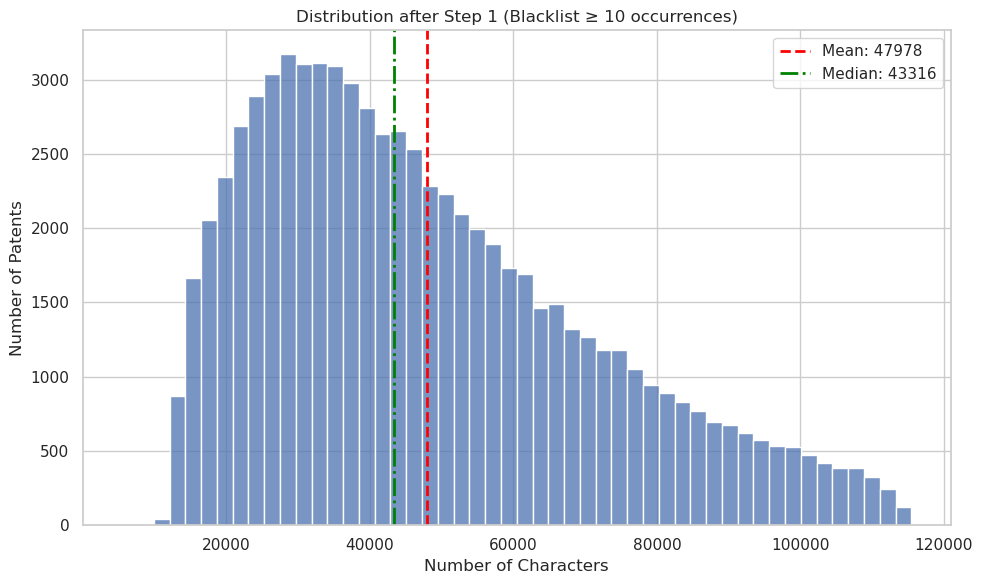

In [7]:
# --- Plot histogram ---
if lengths:
    avg_chars = np.mean(lengths)
    median_chars = np.median(lengths)
    max_chars = max(lengths)

    sns.set(style="whitegrid")
    plt.figure(figsize=(10,6))
    sns.histplot(lengths, bins=50, kde=False)

    plt.axvline(avg_chars, color="red", linestyle="--", linewidth=2, label=f"Mean: {avg_chars:.0f}")
    plt.axvline(median_chars, color="green", linestyle="-.", linewidth=2, label=f"Median: {median_chars:.0f}")

    plt.title(f"Distribution after Step 1 (Blacklist ≥ {freq_threshold} occurrences)")
    plt.xlabel("Number of Characters")
    plt.ylabel("Number of Patents")
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("No valid patents left after filtering.")

Calculating document lengths: 0it [00:00, ?it/s]

Documents: 73986
Average characters: 48719
Median characters: 43899
Max characters: 115440


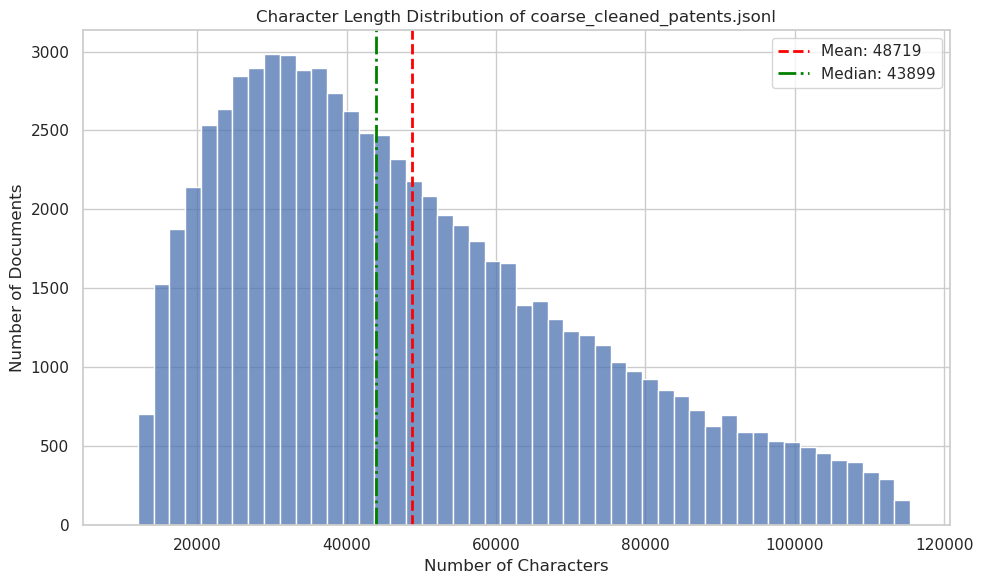

In [9]:
import json
from tqdm.auto import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

input_file = "coarse_cleaned_patents_filtered_dedup_para.jsonl"

# --- Collect character lengths ---
lengths = []
with open(input_file, "r", encoding="utf-8") as f:
    for line in tqdm(f, desc="Calculating document lengths"):
        doc = json.loads(line)
        combined_text = (doc.get("description", "") + " " + doc.get("claim1", "")).strip()
        lengths.append(len(combined_text))

# --- Stats ---
avg_len = np.mean(lengths)
median_len = np.median(lengths)
max_len = max(lengths)

print(f"Documents: {len(lengths)}")
print(f"Average characters: {avg_len:.0f}")
print(f"Median characters: {median_len:.0f}")
print(f"Max characters: {max_len}")

# --- Plot histogram ---
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.histplot(lengths, bins=50, kde=False)

plt.axvline(avg_len, color="red", linestyle="--", linewidth=2, label=f"Mean: {avg_len:.0f}")
plt.axvline(median_len, color="green", linestyle="-.", linewidth=2, label=f"Median: {median_len:.0f}")

plt.title("Character Length Distribution of coarse_cleaned_patents.jsonl")
plt.xlabel("Number of Characters")
plt.ylabel("Number of Documents")
plt.legend()
plt.tight_layout()
plt.show()


Started off at around 7.5 billion characters and now approx. 3.6 billion characters (~50% reduction of noise).

In [10]:
from datasets import load_dataset

# Load the JSONL file
dataset = load_dataset("json", data_files="coarse_cleaned_patents_filtered_dedup_para_bp.jsonl")

dataset = dataset["train"]

# Push to Hugging Face Hub
dataset.push_to_hub("mhurhangee/ep-patents-coarse-cleaned",commit_message="with removing paragraphs which appear with a frequency of 10 or more in the corpus")

Generating train split: 0 examples [00:00, ? examples/s]

Uploading the dataset shards:   0%|          | 0/8 [00:00<?, ? shards/s]

Creating parquet from Arrow format:   0%|          | 0/10 [00:00<?, ?ba/s]

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

                                        :   0%|          |  279kB /  158MB            

Creating parquet from Arrow format:   0%|          | 0/10 [00:00<?, ?ba/s]

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

                                        :   0%|          |  733kB /  155MB            

Creating parquet from Arrow format:   0%|          | 0/10 [00:00<?, ?ba/s]

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

                                        :   0%|          |  411kB /  158MB            

Creating parquet from Arrow format:   0%|          | 0/10 [00:00<?, ?ba/s]

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

                                        :   0%|          |  156kB /  158MB            

Creating parquet from Arrow format:   0%|          | 0/10 [00:00<?, ?ba/s]

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

                                        :   0%|          |  495kB /  155MB            

Creating parquet from Arrow format:   0%|          | 0/10 [00:00<?, ?ba/s]

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

                                        :   0%|          |  380kB /  155MB            

Creating parquet from Arrow format:   0%|          | 0/10 [00:00<?, ?ba/s]

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

                                        :   0%|          |  597kB /  158MB            

Creating parquet from Arrow format:   0%|          | 0/10 [00:00<?, ?ba/s]

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

                                        :   0%|          |  586kB /  158MB            

README.md: 0.00B [00:00, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/mhurhangee/ep-patents-coarse-cleaned/commit/5c86446b0a07635579e4b570d5dfcaed2570ace2', commit_message='with removing paragraphs which appear with a frequency of 10 or more in the corpus', commit_description='', oid='5c86446b0a07635579e4b570d5dfcaed2570ace2', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/mhurhangee/ep-patents-coarse-cleaned', endpoint='https://huggingface.co', repo_type='dataset', repo_id='mhurhangee/ep-patents-coarse-cleaned'), pr_revision=None, pr_num=None)